In [1]:
# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages.
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing.
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

from scipy.stats import ks_2samp

import matplotlib.pyplot as plt

import matplotlib as mpl

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")


In [2]:
def comp_mod_anom(heating, var, plev, amp_list, lat_min, lat_max, lon_min, lon_max, As):
    # Extract nh model data.
    os.chdir("/scratch/w40/gp8431/run/gh_As_"+As+"_2000_amp_0.0")
    
    nh = getattr(xr.open_dataset("plevel_daily_gh.nc", decode_times = False), var)
    
    nh_avg = nh.mean('time')
    
    #fig_model = plt.figure(figsize=(16,16))
    
    amp_ma = []
    # For lon/p plot
    amp_lp = []
    ma_list = []
    # For lon/p plot
    lon_p_list = []

    i = 0

    # Extract model data in a loop.
    for x in amp_list:
        # Extract requested variable in order to compute anomaly.
        h_var = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_"+As+"_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        
        h_var_avg = h_var.mean('time')     
        
        # Compute height anomaly based on extracted values.
        mod_anom_var = h_var_avg-nh_avg

        # Redefine the model anomaly with the zonal average removed. 
        mod_anom_var = mod_anom_var - mod_anom_var.mean('lon')

        # Select plev.
        mod_anom_var_p = mod_anom_var.sel(pfull=plev, lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        mod_anom_var_p_ds = mod_anom_var_p.to_dataset(name=var)
        # DETERMINE ERROR IN AMP APPENDAGE!
        mod_anom_var_p_ds['amp'] = amp_ma.append(float(x))
        ma_list.append(mod_anom_var_p_ds)

        # For lon/p plot
        #mod_anom_var_lonp = mod_anom_var.sel(lat=0.0, method="nearest")
        #mod_anom_var_lonp_ds = mod_anom_var_lonp.to_dataset(name=var)
        #mod_anom_var_lonp_ds['amp'] = amp_lp.append(float(x))
        #lon_p_list.append(mod_anom_var_lonp_ds)
        #mod_hght_anom_eq = mod_anom_hght.sel(lat=0.0, method='nearest')
        #mod_hght_anom_eq_ds = mod_hght_anom_eq.to_dataset(name='hght')
        #mod_hght_anom_eq_ds['amp'] = amp_lph.append(float(x))
        #lon_p_list_h.append(mod_hght_anom_eq_ds)


        i = i + 1
        
    return ma_list #, lon_p_list

In [3]:
# Define a function to do the above based on heating input, temp or height extraction, pressure levels etc.
# ADD A LON/P PLOT!
def lon_lat_plt_mod_anom(heating, var, plev, amp_list, lat_min, lat_max, lon_min, lon_max, As):

    data_list_1 = comp_mod_anom(heating, var, plev, amp_list, lat_min, lat_max, lon_min, lon_max, As)
    print(data_list_1)
    
    plt.rcParams["figure.figsize"] = [27,10]
    # CHANGE NROWS AND NCOLS BASED ON SIZE OF AMP LIST
    fig_proj, ax, trans = Projection(projection='EqualEarth', nrows=2, ncols=1, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
    # REVIEW THIS BY PRINTING AX.FLATTEN
    for a, b in enumerate(ax.flatten()):
        #print(getattr(ma_list[a], var).squeeze())
        # Change levels from 21 to 211 and remove vmin, vmax?
        print(data_list_1[a])
        getattr(data_list_1[a], var).squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
        b.set_title("Amp = " + amp_list[a])

        
    #fig_proj_lonp, ax_lonp, trans = Projection(projection='EqualEarth', nrows=3, ncols=3, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
    
    #print(lon_p_list[0])

    ## BELOW COMMENTED FOR PLOT
    #for c, d in enumerate(ax_lonp.flatten()):
    #    lon_p_list[c].hght.squeeze().plot.contourf(ax_lonp=d, cmap='RdBu_r', levels=21, **trans, vmin=-80.0, vmax=80.0, add_colorbar = False)
    #    d.set_title("Amp = " + amp_list[c])
    
    #norm = mpl.cm.colors.Normalize(vmax=80, vmin=-80)
    #fig_proj.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='RdBu_r'), ax=ax)
    #fig_proj_lonp.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='RdBu_r'), ax=ax_lonp)
    
    # ADD COMMANDS FOR LON/P PLOT HERE!
    # CHECK AMP ACCESS!
    #lon_p_list_concat = xr.concat(lon_p_list, dim='amp')
    ##lon_p_list_h_concat = xr.concat(lon_p_list_h, dim='amp')
    #lon_p_list_concat['amp'] = amp_lp
    ##lon_p_list_h_concat['amp'] = amp_lph
    #test = getattr(lon_p_list_concat, var)
    #fig_proj_lonp = test.plot(x="lon", y="lat", col="amp", col_wrap=3)
    
    
    # BELOW RELATES TO FIG_MODEL
    #ma_list_concat = xr.concat(data_list_1, dim='amp')
    ##lon_p_list_h_concat = xr.concat(lon_p_list_h, dim='amp')
    ## BELOW previously amp_ma instead of amp_list
    #ma_list_concat['amp'] = amp_list
    ##lon_p_list_h_concat['amp'] = amp_lph
    #test = getattr(ma_list_concat, var)
    #fig_proj = test.plot(x="lon", y="lat", col="amp", col_wrap=3)
    
    
    return fig_proj#, fig_proj_lonp #fig_model, fig_proj

[<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
    hght     (lat, lon) float32 -0.6896744 -0.5646744 ... 7.393837 7.048134
    amp      object None, <xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
    hght     (lat, lon) float32 -0.28235626 -0.2345047 ... 5.497078 5.622078
    amp      object None]
<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
  

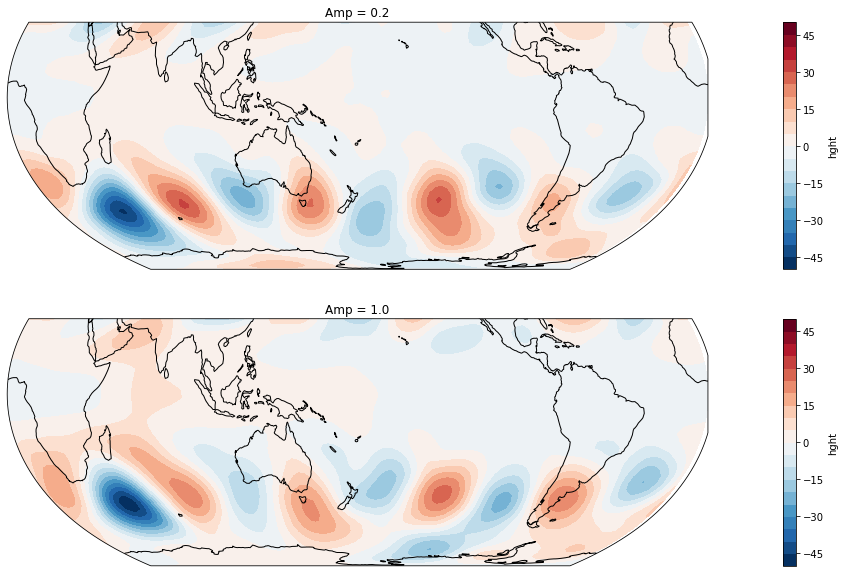

In [4]:
#amp_list = ["-0.1", "-0.2", "-0.4", "-0.6", "-0.8", "-1.0", "-1.2", "-1.4", "-10.0"]
#ic_hght_200 = lon_lat_plt_mod_anom('ih', 'hght', 200, amp_list, -90.0, 30.0, 0.0, 360.0)

#amp_list = ["-0.1", "-0.2", "-0.4", "-0.6", "-0.8", "-1.0", "-1.2", "-1.4", "-10.0"]
#test = plt_mod_anom('gh', 'hght', 200, amp_list, -90.0, 30.0, 0.0, 360.0)
#test.savefig('/home/561/gp8431/ic_hght_200.png')

amp_list = ["0.2", "1.0"]
gh_hght_as_pos = lon_lat_plt_mod_anom('gh', 'hght', 250, amp_list, -90.0, 30.0, 0.0, 360.0, '15')
gh_hght_as_pos.savefig('/home/561/gp8431/gh_hght_as_pos.png')

[<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
    hght     (lat, lon) float32 -2.9041138 -2.9656372 ... 5.402504 4.538246
    amp      object None, <xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
    hght     (lat, lon) float32 -1.9729233 -2.0012436 ... 5.5918045 5.2841873
    amp      object None]
<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
 

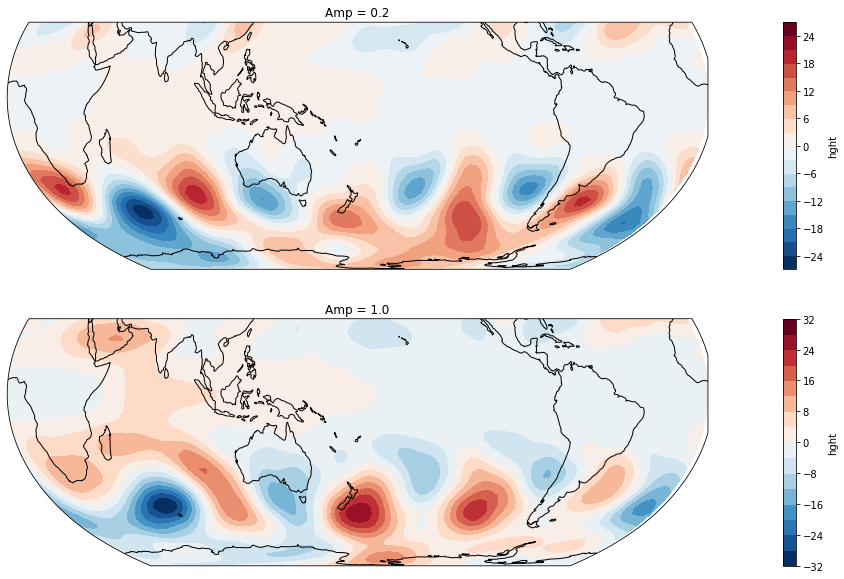

In [5]:
amp_list = ["0.2", "1.0"]
gh_hght_as_neg = lon_lat_plt_mod_anom('gh', 'hght', 250, amp_list, -90.0, 30.0, 0.0, 360.0, '-15')
gh_hght_as_neg.savefig('/home/561/gp8431/gh_hght_as_neg.png')

[<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
    hght     (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    amp      object None, <xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
    hght     (lat, lon) float32 -2.9041138 -2.9656372 ... 5.402504 4.538246
    amp      object None]
<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:

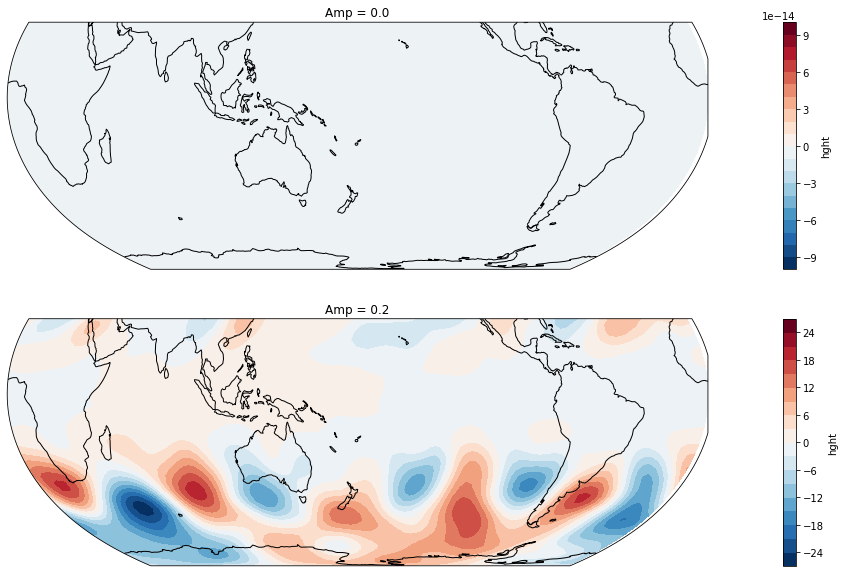

In [6]:
nh_h_hght_as_neg = lon_lat_plt_mod_anom('gh', 'hght', 250, ["0.0", "0.2"], -90.0, 30.0, 0.0, 360.0, '-15')
nh_h_hght_as_neg.savefig('/home/561/gp8431/nh_h_hght_as_neg.png')

[<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
    hght     (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    amp      object None, <xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:
    hght     (lat, lon) float32 -0.6896744 -0.5646744 ... 7.393837 7.048134
    amp      object None]
<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
Data variables:

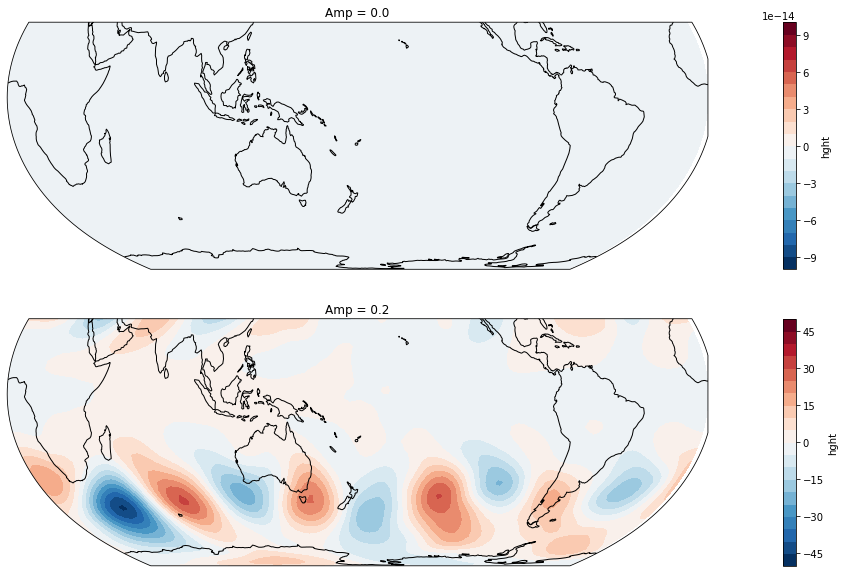

In [7]:
nh_h_hght_as_pos = lon_lat_plt_mod_anom('gh', 'hght', 250, ["0.0", "0.2"], -90.0, 30.0, 0.0, 360.0, '15')
nh_h_hght_as_pos.savefig('/home/561/gp8431/nh_h_hght_as_pos.png')

[<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 200.0
Data variables:
    hght     (lat, lon) float32 -2.990799 -3.070877 ... 5.2602234 4.3735046
    amp      object None, <xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 200.0
Data variables:
    hght     (lat, lon) float32 -2.0125046 -2.072075 ... 4.5703964 4.28817
    amp      object None]
<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 200.0
Data variables:
    

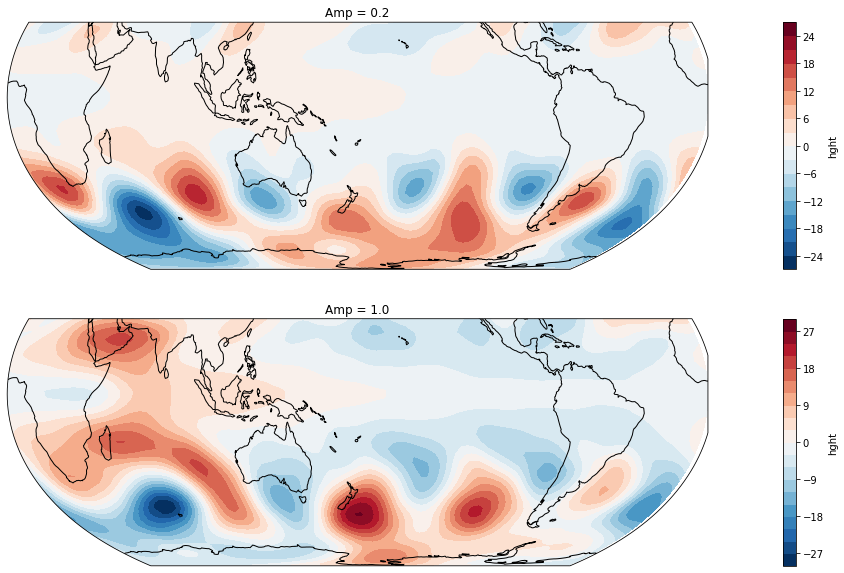

In [8]:
gh_hght_as_neg = lon_lat_plt_mod_anom('gh', 'hght', 200, amp_list, -90.0, 30.0, 0.0, 360.0, '-15')
gh_hght_as_neg.savefig('/home/561/gp8431/gh_hght_as_neg.png')

[<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 200.0
Data variables:
    hght     (lat, lon) float32 -2.990799 -3.070877 ... 5.2602234 4.3735046
    amp      object None, <xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 200.0
Data variables:
    hght     (lat, lon) float32 -2.0125046 -2.072075 ... 4.5703964 4.28817
    amp      object None]
<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 200.0
Data variables:
    

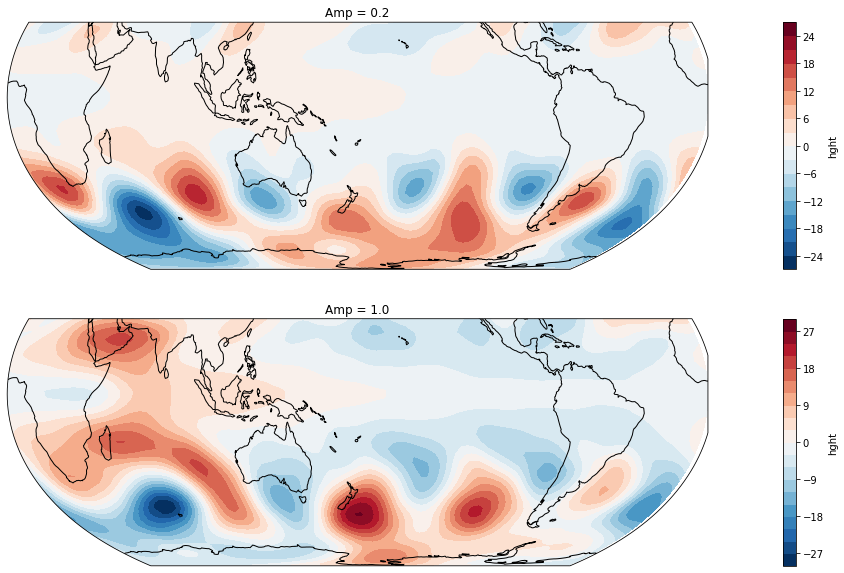

In [9]:
gh_hght_as_neg = lon_lat_plt_mod_anom('gh', 'hght', 200, amp_list, -90.0, 30.0, 0.0, 360.0, '-15')
gh_hght_as_neg.savefig('/home/561/gp8431/gh_hght_as_neg.png')

[<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 500.0
Data variables:
    ucomp    (lat, lon) float32 -0.235495 -0.21331453 ... -1.1238663 -1.4171994
    amp      object None, <xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 500.0
Data variables:
    ucomp    (lat, lon) float32 -0.16462523 -0.15062532 ... -1.0065821
    amp      object None]
<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 500.0
Data variables:
    

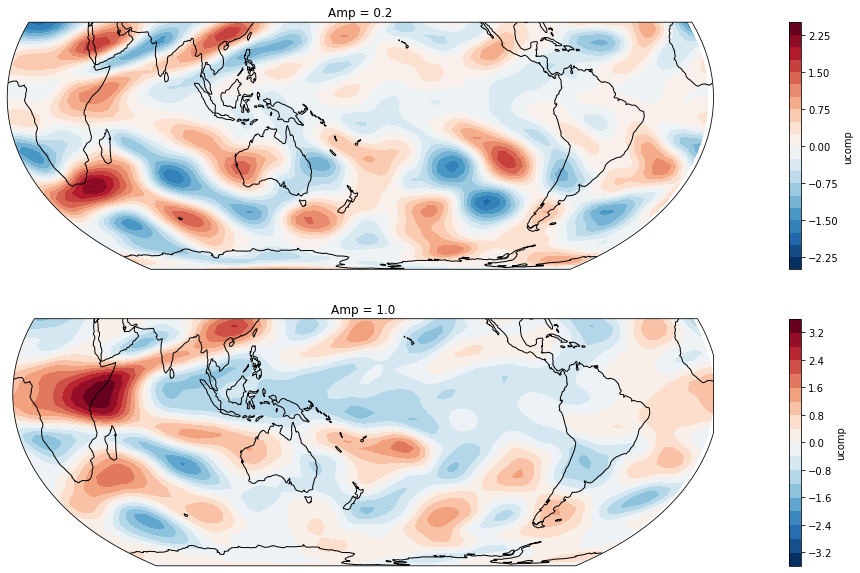

In [10]:
amp_list = ["0.2", "1.0"]
gh_ucomp_as_pos = lon_lat_plt_mod_anom('gh', 'ucomp', 500, amp_list, -90.0, 30.0, 0.0, 360.0, '15')
gh_ucomp_as_pos.savefig('/home/561/gp8431/gh_ucomp_as_pos.png')

[<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 500.0
Data variables:
    ucomp    (lat, lon) float32 -0.3102526 -0.32916874 ... -0.40425098
    amp      object None, <xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 500.0
Data variables:
    ucomp    (lat, lon) float32 -0.27678728 -0.28333342 ... -0.017551601
    amp      object None]
<xarray.Dataset>
Dimensions:  (lat: 43, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 500.0
Data variables:
    ucomp  

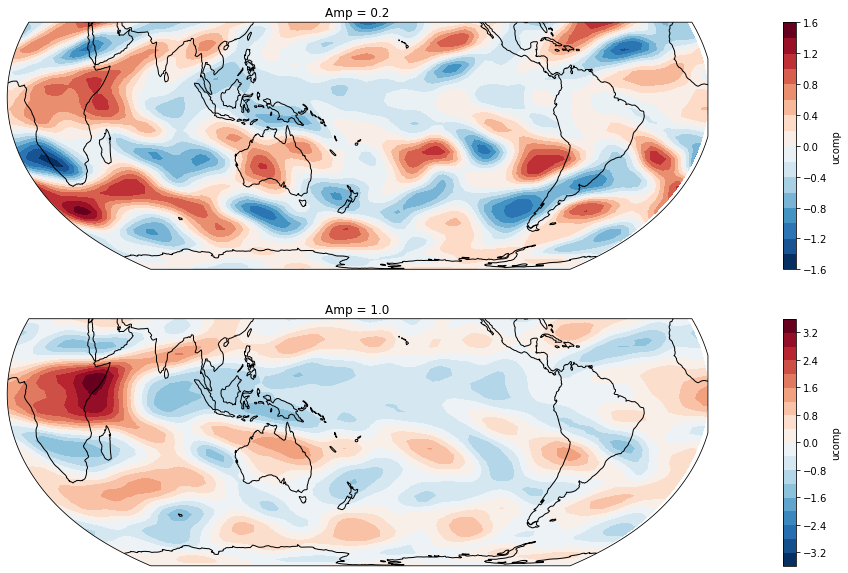

In [11]:
amp_list = ["0.2", "1.0"]
gh_ucomp_as_neg = lon_lat_plt_mod_anom('gh', 'ucomp', 500, amp_list, -90.0, 30.0, 0.0, 360.0, '-15')
gh_ucomp_as_neg.savefig('/home/561/gp8431/gh_ucomp_as_neg.png')

In [12]:
# This cell will make a plot of zonal mean (longitudinal mean) ucomp values as a function of pressure and latitude.
# Later integrate into plotting function?


# For now, this function is simply plotting for the ucomp avg case.
# var = ucomp
# plev not an argument as long avg slice is taken.
# plev could eventually be replaced with lon_slice.
# lon_min, lon_max replaced with p_min, p_max.

def lat_p_mod_anom(heating, var, amp_list, lat_min, lat_max, p_min, p_max, As):
    # Extract nh model data.
    os.chdir("/scratch/w40/gp8431/run/gh_As_"+As+"_2000_amp_0.0")

    nh = getattr(xr.open_dataset("plevel_daily_gh.nc", decode_times = False), var)

    nh_avg = nh.mean('time')
    # THIS LINE ADDED FOR CONTOUR PLOTTING!
    nh_avg_lona = nh_avg.mean('lon')
    print(nh_avg_lona.pfull)
    
    fig_model = plt.figure(figsize=(16,16))
    #fig_model_2 = plt.figure(figsize=(16,16))
    
    # PLOT WITHOUT THE ZERO CASE
    amp_lp = []
    lat_p_list = []
    # PLOT WITH ZERO CASE
    #amp_lp = [0.0]
    #lat_p_list = [nh_avg.mean('lon').to_dataset(name=var)]

    i = 0

    # Extract model data in a loop.
    for x in amp_list:
        # Extract requested variable in order to compute anomaly.
        h_var = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_"+As+"_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        h_var_avg = h_var.mean('time')     

        # Compute variable anomaly based on extracted values.
        mod_anom_var = h_var_avg-nh_avg

        # For lon/p plot
        #print(mod_anom_var)
        mod_anom_var_latp = mod_anom_var.mean('lon').sel(lat=slice(lat_min, lat_max))
        mod_anom_var_latp_ds = mod_anom_var_latp.to_dataset(name=var)
        mod_anom_var_latp_ds['amp'] = amp_lp.append(float(x))
        
        #mod_anom_var_latp_2 = mod_anom_var_latp_ds.to_array
        
        lat_p_list.append(mod_anom_var_latp_ds)
        
        # SOMEHOW ADD AXES EDITS IN HERE.
        
        #print(mod_anom_var_latp_2)
        
        #fig_model = xr.plot.FacetGrid(data=mod_anom_var_latp_2[i],col_wrap=3)
        
        # ADD LATITUDE LIMITS
        
        i = i + 1
        
    #lat_p_list_no_nh = lat_p_list.pop(0)
    #lat_p_list_nn_concat = xr.concat(lat_p_list_no_nh, dim='amp')
    #lat_p_list_nn_concat['amp'] = amp_lp.pop(0)
    #test2 = getattr(lat_p_list_nn_concat, var)

    #fig_model_2 = test2.plot(x="lat", y="pfull", col="amp", col_wrap=3)

    ## BELOW RELATES TO FIG_MODEL - THIS METHOD WORKS BUT CANNOT HAVE AX USED.
    lat_p_list_concat = xr.concat(lat_p_list, dim='amp')
    print(amp_lp)
    lat_p_list_concat['amp'] = amp_lp
    test = getattr(lat_p_list_concat, var)

    #fig_model = test.plot(x="lat", y="pfull", col="amp", col_wrap=3)
    #fig_model, ax = plt.subplots()
    fig_model = test.plot.contourf(x="lat", y="pfull", col="amp", col_wrap=min(3, len(amp_list)), cmap='RdBu_r',levels=np.linspace(-3, 3, 11))
    #ax = fig_model.axes
    
    # TEST CODE FROM DOCUMENTATION
    #print(enumerate(fig_model.axes.flat))
    
    for j, ax in enumerate(fig_model.axes.flat):
        #ax.set_title('anom for amp = %d' % j)
        ax.invert_yaxis()
        ax.set_yscale('log')
        ax.contour(nh_avg_lona.lat, nh_avg_lona.pfull, nh_avg_lona.values, colors='black', levels=np.linspace(-100, 100, 21))
    # FINISH TEST CODE
    
    # Look into d_ylog.plot()
    
    return fig_model #, fig_model_2

<xarray.DataArray 'pfull' (pfull: 21)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.,    5.,    3.,    2.,
          1.], dtype=float32)
Coordinates:
  * pfull    (pfull) float32 1000.0 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
Attributes:
    units:           hPa
    long_name:       pressure
    cartesian_axis:  Z
    axis:            Z
    positive:        down
[0.2, 1.0]


<Figure size 1152x1152 with 0 Axes>

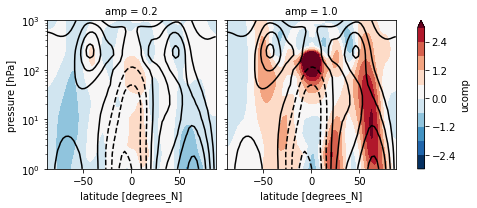

In [13]:
amp_list = ["0.2", "1.0"]
gh_ucomp_as_pos_lat_p = lat_p_mod_anom('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 1000.0, '15')
gh_ucomp_as_pos_lat_p.fig.savefig("/home/561/gp8431/gh_ucomp_as_pos_lat_p.png")

<xarray.DataArray 'pfull' (pfull: 21)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.,    5.,    3.,    2.,
          1.], dtype=float32)
Coordinates:
  * pfull    (pfull) float32 1000.0 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
Attributes:
    units:           hPa
    long_name:       pressure
    cartesian_axis:  Z
    axis:            Z
    positive:        down
[0.2, 1.0]


<Figure size 1152x1152 with 0 Axes>

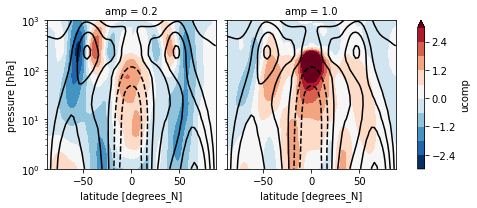

In [14]:
amp_list = ["0.2", "1.0"]
gh_ucomp_as_neg_lat_p = lat_p_mod_anom('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 1000.0, '-15')
gh_ucomp_as_neg_lat_p.fig.savefig("/home/561/gp8431/gh_ucomp_as_neg_lat_p.png")

In [15]:
#amp_list = ["-0.1", "-0.2", "-0.4", "-0.6", "-0.8", "-1.0", "-1.2", "-1.4"]
#zonal_wind_gc_lat_p = lat_p_mod_anom('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 1000.0)
#zonal_wind_gc_lat_p.fig.savefig("/home/561/gp8431/gc_lat_p_ucomp.png")

In [16]:
#amp_list = ["0.1", "0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4"]
#zonal_wind_ih_lat_p = lat_p_mod_anom('ih', 'ucomp', amp_list, -90.0, 90.0, 0.0, 1000.0)
#zonal_wind_ih_lat_p.fig.savefig("/home/561/gp8431/ih_lat_p_ucomp.png")

In [17]:
#amp_list = ["-0.1", "-0.2", "-0.4", "-0.6", "-0.8", "-1.0", "-1.2", "-1.4"]
#zonal_wind_ic_lat_p = lat_p_mod_anom('ih', 'ucomp', amp_list, -90.0, 90.0, 0.0, 1000.0)
#zonal_wind_ic_lat_p.fig.savefig("/home/561/gp8431/ic_lat_p_ucomp.png")

In [18]:
# 1st 10 days of model for 0.1 in facet plot. 
def ten_day_plot(heat_type, heat_amp, var, plev, day_min, day_max, lat_min, lat_max, As):
    # COMMENT OUT AS PART WHEN TAKING NON AS DATA!!
    nh_data = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heat_type+"_As_"+As+"_2000_amp_0.0/plevel_daily_"+heat_type+".nc", decode_times = False), var)
    #nh_data = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heat_type+"_amp_0.0/plevel_daily_"+heat_type+".nc", decode_times = False), var)
    
    nh_data = nh_data.sel(pfull=plev, method='nearest')
    nh_data = nh_data.sel(time=slice(day_min, day_max))
    
    h_data = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heat_type+"_As_"+As+"_2000_amp_"+heat_amp+"/plevel_daily_"+heat_type+".nc", decode_times = False), var).sel(pfull=plev, method='nearest').sel(time=slice(day_min, day_max))
    #h_data = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heat_type+"_amp_"+heat_amp+"/plevel_daily_"+heat_type+".nc", decode_times = False), var).sel(pfull=plev, method='nearest').sel(time=slice(day_min, day_max))

    data_anom = nh_data-h_data
    data_anom = data_anom - data_anom.mean('lon')

    t = data_anom.time

    data_anom = data_anom.sel(lat=slice(lat_min, lat_max))
    data_anom['t'] = t
    print(data_anom)

    plt.rcParams["figure.figsize"] = [27,10]
    fig_data, ax, trans = Projection(projection='EqualEarth', nrows=3, ncols=3, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
    for a, b in enumerate(ax.flatten()):
        data_anom[a].squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)

    return fig_data

In [19]:
#fig_gh = ten_day_plot('gh', '0.1', 'hght', 200.0, 501.0, 509.0, -90.0, 30.0, '15')
#fig_gh.savefig("/home/561/gp8431/ten_day_gh_0.1.png")

#fig_gh = ten_day_plot('gh', '0.2', 'hght', 200.0, 501.0, 509.0, -90.0, 30.0, '15')
#fig_gh.savefig("/home/561/gp8431/ten_day_gh_0.2_as_pos.png")

<xarray.DataArray 'hght' (time: 0, lat: 43, lon: 128)>
array([], shape=(0, 43, 128), dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 20.93 23.72 26.51 29.3
    pfull    float32 250.0
  * time     (time) float64 
    t        (time) float64 


IndexError: index 0 is out of bounds for axis 0 with size 0

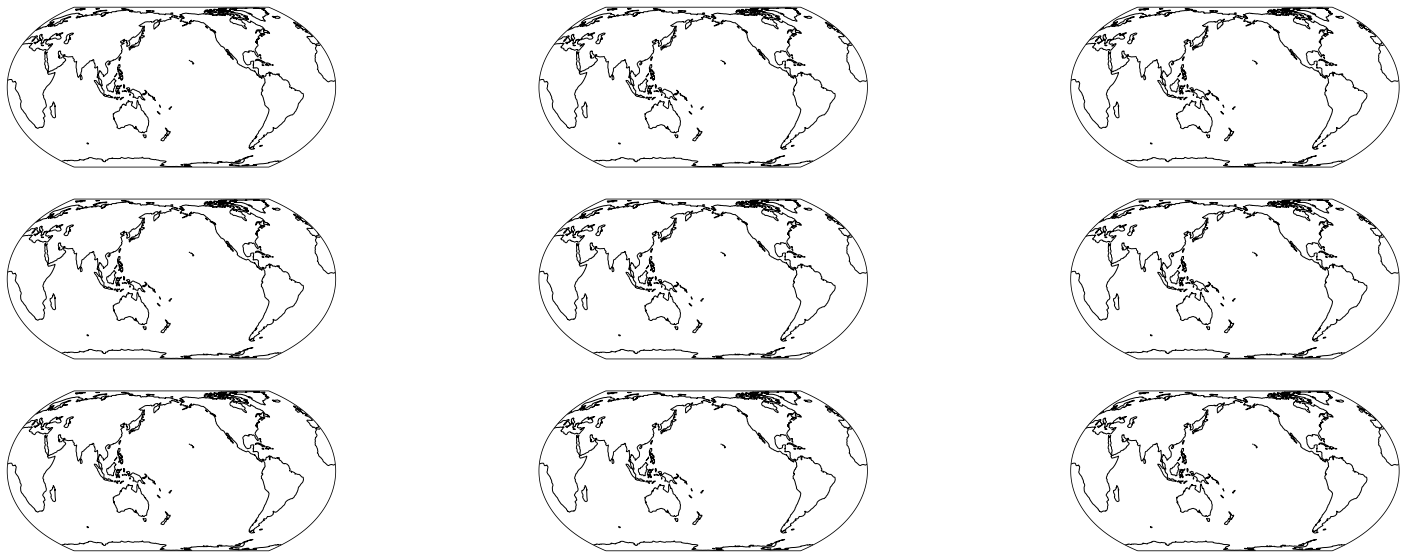

In [20]:
fig_gh_1 = ten_day_plot('gh', '0.2', 'hght', 250.0, 501.0, 509.0, -90.0, 30.0, '-15')
fig_gh_1.savefig("/home/561/gp8431/ten_day_gh_1.0_as_neg.png")

#fig_gc = ten_day_plot('gh', '-0.1', 'hght', 200.0, 501.0, 509.0, -90.0, 30.0)

In [ ]:
fig_gh_2 = ten_day_plot('gh', '0.2', 'hght', 250.0, 501.0, 509.0, -90.0, 30.0, '15')
fig_gh_2.savefig("/home/561/gp8431/ten_day_gh_0.2_as_pos.png")

#fig_ih = ten_day_plot('ih', '0.1', 'hght', 200.0, 501.0, 509.0, -90.0, 30.0)

In [ ]:
fig_gh_3 = ten_day_plot('gh', '1.0', 'hght', 250.0, 501.0, 509.0, -90.0, 30.0, '15')
fig_gh_3.savefig("/home/561/gp8431/ten_day_gh_1.0_as_pos.png")

#fig_ih = ten_day_plot('ih', '-0.1', 'hght', 200.0, 501.0, 509.0, -90.0, 30.0)

In [ ]:
# BREAK UP FUNCTION FOR LON_P AND LON_LAT PLOTS, THEN COMBINE LATER!

def comp_mod_anom_lon_p(heating, var, lat_lev, amp_list, p_min, p_max, lon_min, lon_max, As):
    # Extract nh model data.
    os.chdir("/scratch/w40/gp8431/run/gh_As_"+As+"_2000_amp_0.0")
    
    nh = getattr(xr.open_dataset("plevel_daily_gh.nc", decode_times = False), var)
    
    nh_avg = nh.mean('time')
 
    # For lon/p plot
    amp_lp = []
    lon_p_list = []

    i = 0

    # Extract model data in a loop.
    for x in amp_list:
        # Extract requested variable in order to compute anomaly.
        h_var = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_"+As+"_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        
        h_var_avg = h_var.mean('time')     
        
        # Compute height anomaly based on extracted values.
        mod_anom_var = h_var_avg-nh_avg

        # Redefine the model anomaly with the zonal average removed. 
        mod_anom_var = mod_anom_var - mod_anom_var.mean('lon')

        # For lon/p plot
        # EVENTUALLY ADD LON/P SELECT FUNCTIONS
        mod_anom_var_lonp = mod_anom_var.sel(lat=lat_lev, method="nearest")
        mod_anom_var_lonp_ds = mod_anom_var_lonp.to_dataset(name=var)
        mod_anom_var_lonp_ds['amp'] = amp_lp.append(float(x))
        lon_p_list.append(mod_anom_var_lonp_ds)


        i = i + 1
        
    ## BELOW RELATES TO FIG_MODEL - THIS METHOD WORKS BUT CANNOT HAVE AX USED.
    lon_p_list_concat = xr.concat(lon_p_list, dim='amp')
    lon_p_list_concat['amp'] = amp_lp
    test = getattr(lon_p_list_concat, var)

    #fig_model = test.plot(x="lat", y="pfull", col="amp", col_wrap=3)
    fig_model = test.plot.contourf(x="lon", y="pfull", col="amp", col_wrap=3, cmap='RdBu_r', levels=211)
    #ax = fig_model.axes


    for j, ax in enumerate(fig_model.axes.flat):
        #ax.set_title('anom for amp = %d' % j)
        ax.invert_yaxis()
        #ax.set_yscale('log')
        #ax.contour(nh_avg_lona.lat, nh_avg_lona.pfull, nh_avg_lona.values, colors='black', levels=np.linspace(-100, 100, 21))

        
    return fig_model

In [ ]:
amp_list = ["0.2", "1.0"]
gh_temp_as_pos_lon_p = comp_mod_anom_lon_p('gh', 'temp', 0.0, amp_list, 1.0, 1000.0, 0.0, 360.0, '15')
gh_temp_as_pos_lon_p.fig.savefig("/home/561/gp8431/gh_temp_as_pos_lon_p.png")

In [ ]:
#amp_list = ["0.2", "1.0"]
#gh_hght_as_neg_lon_p = comp_mod_anom_lon_p('gh', 'hght', 0.0, amp_list, 1.0, 1000.0, 0.0, 360.0, '-15')
#gh_hght_as_neg_lon_p.fig.savefig("/home/561/gp8431/gh_hght_as_neg_lon_p.png")

In [ ]:
#amp_list = ["-0.1", "-0.2", "-0.4", "-0.6", "-0.8", "-1.0", "-1.2", "-1.4"] #, "-10.0"]
#ic_hght_eq = comp_mod_anom_lon_p('ih', 'hght', 0.0, amp_list, 1.0, 1000.0, 0.0, 360.0)

In [ ]:
#amp_list = ["0.1", "0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4"] #, "-10.0"]
#ih_hght_eq = comp_mod_anom_lon_p('ih', 'hght', 0.0, amp_list, 1.0, 1000.0, 0.0, 360.0)

In [ ]:
#amp_list = ["-0.1", "-0.2", "-0.4", "-0.6", "-0.8", "-1.0", "-1.2", "-1.4"] #, "-10.0"]
#gc_hght_eq = comp_mod_anom_lon_p('gh', 'hght', 0.0, amp_list, 1.0, 1000.0, 0.0, 360.0)

In [ ]:
#amp_list = ["0.1", "0.2", "0.4", "0.6", "0.8", "1.0", "1.2", "1.4"] #, "-10.0"]
#gh_hght_eq = comp_mod_anom_lon_p('gh', 'hght', 0.0, amp_list, 1.0, 1000.0, 0.0, 360.0)

In [ ]:
# COPY FUNCTION FROM ABOVE BUT TAKE ALL RELEVANT DIFFERENCES RATHER THAN JUST H-NH!!
# FOR THIS CASE, AMP_LIST JUST ACCEPTS A SINGLE VALUE
def lat_p_mod_anom_all(heating, var, amp_list, lat_min, lat_max, p_min, p_max):
    # Extract nh model data.

    nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var)
    nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var)
    
    nh_pos_avg = nh_pos.mean('time')
    nh_neg_avg = nh_neg.mean('time')
    # THIS LINE ADDED FOR CONTOUR PLOTTING!
    nh_pos_avg_lona = nh_pos_avg.mean('lon')
    nh_neg_avg_lona = nh_neg_avg.mean('lon')
    #print(nh_avg_lona.pfull)
    
    fig_model = plt.figure(figsize=(16,16))
    #fig_model_2 = plt.figure(figsize=(16,16))
    
    # PLOT WITHOUT THE ZERO CASE
    amp_lp_hnp = []
    #lat_p_list_hnp = []
    
    amp_lp_hnn = []
    #lat_p_list_hnn = []
    
    amp_lp_pnh = []
    #lat_p_list_pnh = []
    
    amp_lp_pnn = []
    #lat_p_list_pnn = []
    
    amp_lp_diag = []
    #lat_p_list_diag = []
    
    lat_p_list = []
   
    # PLOT WITH ZERO CASE
    #amp_lp = [0.0]
    #lat_p_list = [nh_avg.mean('lon').to_dataset(name=var)]

    i = 0

    # Extract model data in a loop.
    # Loop through h/as cases instead of amp_list!
    for x in amp_list:
        # Extract requested variable in order to compute anomaly.
        h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        h_pos_avg = h_pos.mean('time')     
        
        h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        h_neg_avg = h_neg.mean('time')

        # Compute variable anomaly based on extracted values.
        
        # INSTEAD OF MAKING SEPARATE LISTS, MAKE EACH DIFFERENCE A LIST ELEMENT!
        h_nh_pos = h_pos_avg-nh_pos_avg
        h_nh_pos_latp = h_nh_pos.mean('lon').sel(lat=slice(lat_min, lat_max))
        h_nh_pos_latp_ds = h_nh_pos_latp.to_dataset(name=var)
        h_nh_pos_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(h_nh_pos_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        h_nh_neg = h_neg_avg-nh_neg_avg
        h_nh_neg_latp = h_nh_neg.mean('lon').sel(lat=slice(lat_min, lat_max))
        h_nh_neg_latp_ds = h_nh_neg_latp.to_dataset(name=var)
        h_nh_neg_latp_ds['amp'] = amp_lp_hnn.append(float(x)) 
        lat_p_list.append(h_nh_neg_latp_ds)
        #lat_p_list_hnn.append(h_nh_neg_latp_ds)
        
        pos_neg_h = h_pos_avg-h_neg_avg
        pos_neg_h_latp = pos_neg_h.mean('lon').sel(lat=slice(lat_min, lat_max))
        pos_neg_h_latp_ds = pos_neg_h_latp.to_dataset(name=var)
        pos_neg_h_latp_ds['amp'] = amp_lp_pnh.append(float(x))
        lat_p_list.append(pos_neg_h_latp_ds)
        #lat_p_list_pnh.append(pos_neg_h_latp_ds)
        
        pos_neg_nh = nh_pos_avg-nh_neg_avg
        pos_neg_nh_latp = pos_neg_nh.mean('lon').sel(lat=slice(lat_min, lat_max))
        pos_neg_nh_latp_ds = pos_neg_nh_latp.to_dataset(name=var)
        pos_neg_nh_latp_ds['amp'] = amp_lp_pnn.append(float(x))  
        lat_p_list.append(pos_neg_nh_latp_ds)
        #lat_p_list_pnn.append(pos_neg_nh_latp_ds)
        
        diag_anom = h_pos_avg-nh_neg_avg
        diag_anom_latp = diag_anom.mean('lon').sel(lat=slice(lat_min, lat_max))
        diag_anom_latp_ds = diag_anom_latp.to_dataset(name=var)
        diag_anom_latp_ds['amp'] = amp_lp_diag.append(float(x))
        lat_p_list.append(diag_anom_latp_ds)
        #lat_p_list_diag.append(diag_anom_latp_ds)
        
        i = i + 1
        
    #lat_p_list_no_nh = lat_p_list.pop(0)
    #lat_p_list_nn_concat = xr.concat(lat_p_list_no_nh, dim='amp')
    #lat_p_list_nn_concat['amp'] = amp_lp.pop(0)
    #test2 = getattr(lat_p_list_nn_concat, var)

    #fig_model_2 = test2.plot(x="lat", y="pfull", col="amp", col_wrap=3)

    ## BELOW RELATES TO FIG_MODEL - THIS METHOD WORKS BUT CANNOT HAVE AX USED.
    ## TRY TO FIX BY TAKING AMP --> TITLE
    lat_p_list_concat = xr.concat(lat_p_list, dim='title')
    # CHOOSE AN ARBITRARY AMP LIST BEFORE FIXING!
    #lat_p_list_concat['amp'] = [0.2, 0.2, 0.2, 0.2, 0.2] #amp_lp_hnp
    lat_p_list_concat['title'] = ['hnp', 'hnn', 'pnh', 'pnn', 'diag']
    test = getattr(lat_p_list_concat, var)

    #fig_model = test.plot(x="lat", y="pfull", col="amp", col_wrap=3)
    #fig_model, ax = plt.subplots()
    fig_model = test.plot.contourf(x="lat", y="pfull", col="title", col_wrap=5, cmap='RdBu_r', levels=np.linspace(-12, 10, 41))
    #ax = fig_model.axes
    
    # TEST CODE FROM DOCUMENTATION
    #print(enumerate(fig_model.axes.flat))
    
    for j, ax in enumerate(fig_model.axes.flat):
    #    #ax.set_title('anom for amp = %d' % j)
        ax.invert_yaxis()
        ax.set_yscale('log')
    #    ax.contour(nh_avg_lona.lat, nh_avg_lona.pfull, nh_avg_lona.values, colors='black', levels=np.linspace(-100, 100, 21))
    ## FINISH TEST CODE
    
    # Look into d_ylog.plot()
    
    return fig_model #, fig_model_2

In [ ]:
amp_list = ["1.0"]
diff_plots_gh_10 = lat_p_mod_anom_all('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 1000.0)
diff_plots_gh_10.fig.savefig("/home/561/gp8431/diff_plots_gh_10.png")

In [ ]:
# This will plot the 3x3 facet plot requested. 

# MODIFY ABOVE FUNCTION!
# FOR THIS CASE, AMP_LIST JUST ACCEPTS A SINGLE VALUE

def lat_p_mod_anom_all(heating, var, amp_list, lat_min, lat_max, p_min, p_max):
    # Extract nh model data.

    nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var)
    nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var)
    
    nh_pos_avg = nh_pos.mean('time')
    nh_neg_avg = nh_neg.mean('time')
    # THIS LINE ADDED FOR CONTOUR PLOTTING!
    nh_pos_avg_lona = nh_pos_avg.mean('lon')
    nh_neg_avg_lona = nh_neg_avg.mean('lon')
    #print(nh_avg_lona.pfull)
    
    fig_model = plt.figure(figsize=(16,16))
    #fig_model_2 = plt.figure(figsize=(16,16))
    
    # PLOT WITHOUT THE ZERO CASE
    amp_lp_hnp = []
    #lat_p_list_hnp = []
    
    amp_lp_hnn = []
    #lat_p_list_hnn = []
    
    amp_lp_pnh = []
    #lat_p_list_pnh = []
    
    amp_lp_pnn = []
    #lat_p_list_pnn = []
    
    amp_lp_diag = []
    #lat_p_list_diag = []
    
    lat_p_list = []
    
    contour_list = []
   
    # PLOT WITH ZERO CASE
    #amp_lp = [0.0]
    #lat_p_list = [nh_avg.mean('lon').to_dataset(name=var)]

    i = 0

    # Extract model data in a loop.
    # Loop through h/as cases instead of amp_list!
    for x in amp_list:
        # Extract requested variable in order to compute anomaly.
        h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        h_pos_avg = h_pos.mean('time')     
        
        h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        h_neg_avg = h_neg.mean('time')

        # Compute variable anomaly based on extracted values.
        
        # INSTEAD OF MAKING SEPARATE LISTS, MAKE EACH DIFFERENCE A LIST ELEMENT!
        
        # Make plots 1, 2, 4, 5 empty, then overlay.
        #p1 = nh_neg_avg
        p1 = nh_neg_avg - nh_neg_avg
        p1_latp = p1.mean('lon').sel(lat=slice(lat_min, lat_max))
        p1_latp_ds = p1_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p1_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        #p2 = nh_pos_avg
        p2 = nh_pos_avg - nh_pos_avg
        p2_latp = p2.mean('lon').sel(lat=slice(lat_min, lat_max))
        p2_latp_ds = p2_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p2_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        p3 = nh_pos_avg-nh_neg_avg
        p3_latp = p3.mean('lon').sel(lat=slice(lat_min, lat_max))
        p3_latp_ds = p3_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p3_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        #p4 = h_neg_avg
        p4 = h_neg_avg - h_neg_avg
        p4_latp = p4.mean('lon').sel(lat=slice(lat_min, lat_max))
        p4_latp_ds = p4_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p4_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        #p5 = h_pos_avg
        p5 = h_pos_avg - h_pos_avg
        p5_latp = p5.mean('lon').sel(lat=slice(lat_min, lat_max))
        p5_latp_ds = p5_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p5_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)  
        
        p6 = h_pos_avg-h_neg_avg
        p6_latp = p6.mean('lon').sel(lat=slice(lat_min, lat_max))
        p6_latp_ds = p6_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p6_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        p7 = h_neg_avg-nh_neg_avg
        p7_latp = p7.mean('lon').sel(lat=slice(lat_min, lat_max))
        p7_latp_ds = p7_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p7_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        p8 = h_pos_avg-nh_pos_avg
        p8_latp = p8.mean('lon').sel(lat=slice(lat_min, lat_max))
        p8_latp_ds = p8_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p8_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        p9 = h_pos_avg-nh_neg_avg
        p9_latp = p9.mean('lon').sel(lat=slice(lat_min, lat_max))
        p9_latp_ds = p9_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p9_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        i = i + 1
        
    #lat_p_list_no_nh = lat_p_list.pop(0)
    #lat_p_list_nn_concat = xr.concat(lat_p_list_no_nh, dim='amp')
    #lat_p_list_nn_concat['amp'] = amp_lp.pop(0)
    #test2 = getattr(lat_p_list_nn_concat, var)

    #fig_model_2 = test2.plot(x="lat", y="pfull", col="amp", col_wrap=3)

    ## BELOW RELATES TO FIG_MODEL - THIS METHOD WORKS BUT CANNOT HAVE AX USED.
    ## TRY TO FIX BY TAKING AMP --> TITLE
    lat_p_list_concat = xr.concat(lat_p_list, dim='title')
    # CHOOSE AN ARBITRARY AMP LIST BEFORE FIXING!
    #lat_p_list_concat['amp'] = [0.2, 0.2, 0.2, 0.2, 0.2] #amp_lp_hnp
    lat_p_list_concat['title'] = ['1:_h_clim_As_clim', '2:_h_clim_As_19', '3:_2-1', '4:_h_19_As_clim', '5:_h_19_As_19', '6:_5-4', '7:_4-1', '8:_5-2', '9:_5-1']
    test = getattr(lat_p_list_concat, var)

    print(nh_neg_avg.mean('lon'))
    #print(test[0])
    
    #fig_model = test.plot(x="lat", y="pfull", col="amp", col_wrap=3)
    #fig_model, ax = plt.subplots()
    ### fig_model = test.plot.contourf(x="lat", y="pfull", col="title", col_wrap=3, cmap='RdBu_r', levels=211)
    
    #fig_model = test.plot.contour(x="lat", y="pfull", col="title", col_wrap=3, cmap='RdBu_r', levels=211)
    fig_model = test.plot.contourf(x="lat", y="pfull", col="title", col_wrap=3, cmap='RdBu_r', levels=21, vmin=-10, vmax=10)
    #ax = fig_model.axes
    
    # TEST CODE FROM DOCUMENTATION
    #print(enumerate(fig_model.axes.flat))
    
    contour_list = [nh_neg_avg.mean('lon'), nh_pos_avg.mean('lon'), h_neg_avg.mean('lon'), h_pos_avg.mean('lon')]
    c = 0
    
    for j, ax in enumerate(fig_model.axes.flat):
    # ADD FOR LOOP ELEMENT - FOR AX IN [1, 2, 4, 5]
        if j in [0, 1, 3, 4]:
            data = contour_list[c]
            ax.contour(data.lat, data.pfull, data.values, colors='black', levels=np.linspace(-100, 100, 21))
            c = c + 1
    #    #ax.set_title('anom for amp = %d' % j)
        ax.invert_yaxis()
        ax.set_yscale('log')
    #    ax.contour(nh_avg_lona.lat, nh_avg_lona.pfull, nh_avg_lona.values, colors='black', levels=np.linspace(-100, 100, 21))
    ## FINISH TEST CODE
    
    # Look into d_ylog.plot()
    
    return fig_model #, fig_model_2

In [ ]:
amp_list = ["0.2"]
plots_gh_02 = lat_p_mod_anom_all('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 100.0)
plots_gh_02.fig.savefig("/home/561/gp8431/plots_gh_02.png")

In [ ]:
amp_list = ["1.0"]
plots_gh_1 = lat_p_mod_anom_all('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 1000.0)
plots_gh_1.fig.savefig("/home/561/gp8431/plots_gh_1.png")

In [ ]:
# Rossby anomaly plots for four cases - use to compare to era

# comp_mod_anom(heating, var, plev, amp_list, lat_min, lat_max, lon_min, lon_max, As) returns a list - append to a larger list then plot!


list = [comp_mod_anom('gh', 'hght', 250, ["0.0"], -90.0, 30.0, 0.0, 360.0, '-15'), comp_mod_anom('gh', 'hght', 250, ["0.0"], -90.0, 30.0, 0.0, 360.0, '15'), comp_mod_anom('gh', 'hght', 250, ["0.2"], -90.0, 30.0, 0.0, 360.0, '-15'), comp_mod_anom('gh', 'hght', 250, ["0.2"], -90.0, 30.0, 0.0, 360.0, '15')]

list_concat = xr.concat(list, dim='title')
list_concat['title'] = ['h_clim_As_clim', 'h_clim_As_19', 'h_19_As_clim', 'h_19_As_19']



#lat_p_list_concat = xr.concat(lat_p_list, dim='title')
#lat_p_list_concat['title'] = ['1:_h_clim_As_clim', '2:_h_clim_As_19', '3:_2-1', '4:_h_19_As_clim', '5:_h_19_As_19', '6:_5-4', '7:_4-1', '8:_5-2', '9:_5-1']
#test = getattr(lat_p_list_concat, var)
#fig_model = test.plot.contourf(x="lat", y="pfull", col="title", col_wrap=3, cmap='RdBu_r', levels=21, vmin=-10, vmax=10)


#for j, ax in enumerate(fig_model.axes.flat):
##    #ax.set_title('anom for amp = %d' % j)
#    ax.invert_yaxis()
#    ax.set_yscale('log')


# 
#    plt.rcParams["figure.figsize"] = [27,10]
#    # CHANGE NROWS AND NCOLS BASED ON SIZE OF AMP LIST
#    fig_proj, ax, trans = Projection(projection='EqualEarth', nrows=2, ncols=1, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
#    # REVIEW THIS BY PRINTING AX.FLATTEN
#    for a, b in enumerate(ax.flatten()):
#        #print(getattr(ma_list[a], var).squeeze())
#        # Change levels from 21 to 211 and remove vmin, vmax?
#        getattr(data_list_1[a], var).squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
#        b.set_title("Amp = " + amp_list[a])

In [ ]:
print(list)

In [ ]:
# Hovmoller plot function (h-nh) for A_s clim and A_s 2019
# This will plot the 3x3 facet plot requested. 

# MODIFY ABOVE FUNCTION!
# FOR THIS CASE, AMP_LIST JUST ACCEPTS A SINGLE VALUE

def hovmoller(heating, var, amp_list, lat_min, lat_max, p_min, p_max):
    # Extract nh model data.

    nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var)
    nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var)
    
    #nh_pos_avg = nh_pos.mean('time')
    #nh_neg_avg = nh_neg.mean('time')
    # THIS LINE ADDED FOR CONTOUR PLOTTING!
    #nh_pos_avg_lona = nh_pos_avg.mean('lon')
    #nh_neg_avg_lona = nh_neg_avg.mean('lon')
    #print(nh_avg_lona.pfull)
    
    fig_model = plt.figure(figsize=(16,16))
    #fig_model_2 = plt.figure(figsize=(16,16))
    
    # PLOT WITHOUT THE ZERO CASE
    amp_lp_hnp = []
    #lat_p_list_hnp = []
    
    amp_lp_hnn = []
    #lat_p_list_hnn = []
    
    amp_lp_pnh = []
    #lat_p_list_pnh = []
    
    amp_lp_pnn = []
    #lat_p_list_pnn = []
    
    amp_lp_diag = []
    #lat_p_list_diag = []
    
    lat_p_list = []
    
    contour_list = []
   
    # PLOT WITH ZERO CASE
    #amp_lp = [0.0]
    #lat_p_list = [nh_avg.mean('lon').to_dataset(name=var)]

    i = 0

    # Extract model data in a loop.
    # Loop through h/as cases instead of amp_list!
    for x in amp_list:
        # Extract requested variable in order to compute anomaly.
        h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        #h_pos_avg = h_pos.mean('time')     
        
        h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+x+"/plevel_daily_"+heating+".nc", decode_times = False), var)
        #h_neg_avg = h_neg.mean('time')

        # Compute variable anomaly based on extracted values.
        
        # INSTEAD OF MAKING SEPARATE LISTS, MAKE EACH DIFFERENCE A LIST ELEMENT!
        
        # Make plots 1, 2, 4, 5 empty, then overlay.
        ##p1 = nh_neg_avg
        #p1 = nh_neg_avg - nh_neg_avg
        #p1_latp = p1.mean('lon').sel(lat=slice(lat_min, lat_max))
        #p1_latp_ds = p1_latp.to_dataset(name=var)
        ##p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        #lat_p_list.append(p1_latp_ds)
        ##lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        ##p2 = nh_pos_avg
        #p2 = nh_pos_avg - nh_pos_avg
        #p2_latp = p2.mean('lon').sel(lat=slice(lat_min, lat_max))
        #p2_latp_ds = p2_latp.to_dataset(name=var)
        ##p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        #lat_p_list.append(p2_latp_ds)
        ##lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        #p3 = nh_pos_avg-nh_neg_avg
        #p3_latp = p3.mean('lon').sel(lat=slice(lat_min, lat_max))
        #p3_latp_ds = p3_latp.to_dataset(name=var)
        ##p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        #lat_p_list.append(p3_latp_ds)
        ##lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        ##p4 = h_neg_avg
        #p4 = h_neg_avg - h_neg_avg
        #p4_latp = p4.mean('lon').sel(lat=slice(lat_min, lat_max))
        #p4_latp_ds = p4_latp.to_dataset(name=var)
        ##p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        #lat_p_list.append(p4_latp_ds)
        ##lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        ##p5 = h_pos_avg
        #p5 = h_pos_avg - h_pos_avg
        #p5_latp = p5.mean('lon').sel(lat=slice(lat_min, lat_max))
        #p5_latp_ds = p5_latp.to_dataset(name=var)
        ##p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        #lat_p_list.append(p5_latp_ds)
        ##lat_p_list_hnp.append(h_nh_pos_latp_ds)  
        
        #p6 = h_pos_avg-h_neg_avg
        #p6_latp = p6.mean('lon').sel(lat=slice(lat_min, lat_max))
        #p6_latp_ds = p6_latp.to_dataset(name=var)
        ##p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        #lat_p_list.append(p6_latp_ds)
        ##lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        p7 = h_neg-nh_neg
        p7_latp = p7.mean('lon').sel(lat=slice(lat_min, lat_max), pfull=300)
        p7_latp_ds = p7_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p7_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        p8 = h_pos-nh_pos
        p8_latp = p8.mean('lon').sel(lat=slice(lat_min, lat_max), pfull=300)
        p8_latp_ds = p8_latp.to_dataset(name=var)
        #p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        lat_p_list.append(p8_latp_ds)
        #lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        #p9 = h_pos_avg-nh_neg_avg
        #p9_latp = p9.mean('lon').sel(lat=slice(lat_min, lat_max))
        #p9_latp_ds = p9_latp.to_dataset(name=var)
        ##p1_latp_ds['amp'] = amp_lp_hnp.append(float(x))
        #lat_p_list.append(p9_latp_ds)
        ##lat_p_list_hnp.append(h_nh_pos_latp_ds)
        
        i = i + 1
        
    #lat_p_list_no_nh = lat_p_list.pop(0)
    #lat_p_list_nn_concat = xr.concat(lat_p_list_no_nh, dim='amp')
    #lat_p_list_nn_concat['amp'] = amp_lp.pop(0)
    #test2 = getattr(lat_p_list_nn_concat, var)

    #fig_model_2 = test2.plot(x="lat", y="pfull", col="amp", col_wrap=3)

    ## BELOW RELATES TO FIG_MODEL - THIS METHOD WORKS BUT CANNOT HAVE AX USED.
    ## TRY TO FIX BY TAKING AMP --> TITLE
    lat_p_list_concat = xr.concat(lat_p_list, dim='title')
    # CHOOSE AN ARBITRARY AMP LIST BEFORE FIXING!
    #lat_p_list_concat['amp'] = [0.2, 0.2, 0.2, 0.2, 0.2] #amp_lp_hnp
    lat_p_list_concat['title'] = ['1:_Hovmoller_As_clim', '2:_Hovmoller_As_19']
    test = getattr(lat_p_list_concat, var)

    #print(nh_neg_avg.mean('lon'))
    #print(test[0])
    
    #fig_model = test.plot(x="lat", y="pfull", col="amp", col_wrap=3)
    #fig_model, ax = plt.subplots()
    ### fig_model = test.plot.contourf(x="lat", y="pfull", col="title", col_wrap=3, cmap='RdBu_r', levels=211)
    
    #fig_model = test.plot.contour(x="lat", y="pfull", col="title", col_wrap=3, cmap='RdBu_r', levels=211)
    fig_model = test.plot.contourf(x="lat", y="time", col="title", col_wrap=2, cmap='RdBu_r', levels=21, vmin=-10, vmax=10)
    #ax = fig_model.axes
    
    # TEST CODE FROM DOCUMENTATION
    #print(enumerate(fig_model.axes.flat))
    
    #contour_list = [nh_neg_avg.mean('lon'), nh_pos_avg.mean('lon'), h_neg_avg.mean('lon'), h_pos_avg.mean('lon')]
    #c = 0
    
    #for j, ax in enumerate(fig_model.axes.flat):
    # ADD FOR LOOP ELEMENT - FOR AX IN [1, 2, 4, 5]
        #if j in [0, 1, 3, 4]:
        #    data = contour_list[c]
        #    ax.contour(data.lat, data.pfull, data.values, colors='black', levels=np.linspace(-100, 100, 21))
        #    c = c + 1
    #    #ax.set_title('anom for amp = %d' % j)
        #ax.invert_yaxis()
        #ax.set_yscale('log')
    #    ax.contour(nh_avg_lona.lat, nh_avg_lona.pfull, nh_avg_lona.values, colors='black', levels=np.linspace(-100, 100, 21))
    ## FINISH TEST CODE
    
    # Look into d_ylog.plot()
    
    return fig_model #, fig_model_2

In [ ]:
amp_list = ["0.2"]
hov_gh_02 = hovmoller('gh', 'ucomp', amp_list, -90.0, 0.0, 0.0, 100.0)
hov_gh_02.fig.savefig("/home/561/gp8431/hovmoller_gh_02.png")

In [23]:
# Amp list is just a single dimension here
def stats_yay(heating, var, amp_list, lat_min, lat_max, p_min, p_max, x_axis, y_axis):
    fig_p = plt.figure(figsize=(16,16))
    fig_p_filtered = plt.figure(figsize=(16,16))
    fig_diff_7_filtered = plt.figure(figsize=(16,16))
    #fig_model_2 = plt.figure(figsize=(16,16))
    
    # CHECK WHICH LISTS ARE REQUIRED!
    # PLOT WITHOUT THE ZERO CASE
    amp_lp_hnp = []
    #lat_p_list_hnp = []
    
    amp_lp_hnn = []
    #lat_p_list_hnn = []
    
    amp_lp_pnh = []
    #lat_p_list_pnh = []
    
    amp_lp_pnn = []
    #lat_p_list_pnn = []
    
    amp_lp_diag = []
    #lat_p_list_diag = []
    
    lat_p_list = []
    
    # Read in data with time dimension:
    # TAKE MEAN IN LON?? 
    
    # Do significance test on data - names correspond to figure numbers. 
    # INSTEAD MAKE INTO A DATAARRAY??
    
    # ADD DIM VARIABLES
    
    # ADD ANOTHER FOR LOOP TO INITIALISE!
    
    if (var=='ucomp'):
        stat_3 = np.zeros((64, 21))
    elif (var=='hght'):
        stat_3 = np.zeros((128, 64))
    
    stat_6 = np.zeros_like(stat_3)
    stat_6 = np.zeros_like(stat_3)
    stat_7 = np.zeros_like(stat_3)
    stat_8 = np.zeros_like(stat_3)
    stat_9 = np.zeros_like(stat_3) 
    
    p_3 = np.zeros_like(stat_3)
    p_6 = np.zeros_like(stat_3)
    p_7 = np.zeros_like(stat_3)
    p_8 = np.zeros_like(stat_3)
    p_9 = np.zeros_like(stat_3)
    
    # ADD IF STATEMENT FOR MEAN LON OR SEL 250hPa DEPENDING ON VAR (HGHT OR UCOMP)
    
    #nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    #nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    
    #h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
    #h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon') 
    
    if (var == 'ucomp'):
        nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
        nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
        h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
        h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
        
        for j in range(21):
            for i in range(64):
                stat_3[i,j], p_3[i,j] = ks_2samp(nh_pos.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)
                stat_6[i,j], p_6[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, h_neg.isel(lat=i, pfull=j).values)
                stat_7[i,j], p_7[i,j] = ks_2samp(h_neg.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)
                stat_8[i,j], p_8[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, nh_pos.isel(lat=i, pfull=j).values)
                stat_9[i,j], p_9[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)
        
    elif (var=='hght'):
        nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).sel(pfull=250.0)
        nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).sel(pfull=250.0)
        h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).sel(pfull=250.0)
        h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).sel(pfull=250.0)
        
        for j in range(64):
            for i in range(128):
                stat_3[i,j], p_3[i,j] = ks_2samp(nh_pos.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
                stat_6[i,j], p_6[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, h_neg.isel(lon=i, lat=j).values)
                stat_7[i,j], p_7[i,j] = ks_2samp(h_neg.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
                stat_8[i,j], p_8[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, nh_pos.isel(lon=i, lat=j).values)
                stat_9[i,j], p_9[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
    
    # MAKE EACH ELEMENT AN XARRAY, THEN ADD COORDINATES (FIG_NUM), THEN CONCAT
    #p_val = [p_3, p_6, p_7, p_8, p_9]

    
    # LATITUDE MAY HAVE ALREADY BEEN CREATED VIA INDEXING IN LOOP?
    # RENAME DIMENSIONS!
    p_1_x = (nh_neg-nh_neg).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_1_x['fig_num'] = 1
    
    p_2_x = (nh_pos-nh_pos).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_2_x['fig_num'] = 2
    
    #p_3_x = xr.DataArray(p_3, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_3_x = xr.DataArray(p_3, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_3_x['fig_num'] = 3
    
    p_4_x = (h_neg-h_neg).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_4_x['fig_num'] = 4    
    
    p_5_x = (h_pos-h_pos).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_5_x['fig_num'] = 5
    
    #p_6_x = xr.DataArray(p_6, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_6_x = xr.DataArray(p_6, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_6_x['fig_num'] = 6
    
    #p_7_x = xr.DataArray(p_7, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_7_x = xr.DataArray(p_7, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_7_x['fig_num'] = 7
    
    #p_8_x = xr.DataArray(p_8, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_8_x = xr.DataArray(p_8, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_8_x['fig_num'] = 8
    
    #p_9_x = xr.DataArray(p_9, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_9_x = xr.DataArray(p_9, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_9_x['fig_num'] = 9
    
    p_val = [p_1_x, p_2_x, p_3_x, p_4_x, p_5_x, p_6_x, p_7_x, p_8_x, p_9_x]
    
    # Concat all pvals
    p_val_concat = xr.concat(p_val, dim='fig_num', coords='minimal')
    p_val_concat['fig_num'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    p_val_data = p_val_concat
    
    #p_val_data = p_val_data.rename({"dim_0":"lat", "dim_1":"pfull"})
    
    fig_p = p_val_data.plot.contourf(x=x_axis, y=y_axis, col="fig_num", col_wrap=3, cmap='RdBu_r', levels=21)
    
    fig_p_filtered = p_val_data.where(p_val_data < 0.05).plot.contourf(x=x_axis, y=y_axis, col="fig_num", col_wrap=3, cmap='RdBu_r', levels=21)
    
    # DataArray.where(pval<0.05).plot()
    
    # Compute difference plots 
    
    # ADD A FUNCTION TO RETURN H_NEG AND NH_NEG!!
    
    diff = [(nh_neg-nh_neg).mean('time'), (nh_pos-nh_pos).mean('time'), (nh_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_neg-h_neg).mean('time'), (h_pos-h_pos).mean('time'), (h_pos-h_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_neg-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_pos-nh_pos).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time')]
    #diff = diff.sel(lat=slice(lat_min, lat_max)).mean('time')
    #diff_7 = h_neg-nh_neg
    #print(diff_7)
    #diff_7 = diff_7.sel(lat=slice(lat_min, lat_max)).mean('time')
    
    diff_concat = xr.concat(diff, dim='fig_num')
    diff_concat['fig_num'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    #print(p_val_data)
    #print(diff_concat)
    
    #diff = diff.sel(lat=slice(lat_min, lat_max)).mean('time')
    
    #diff_7_filt = diff_7.where(p_val_data[2] < 0.05)
    diff_filt = diff_concat.where(p_val_data < 0.05)
    
    #fig_diff_7_filtered = diff_7_filt.plot.contourf(x='lat', y='pfull', cmap='RdBu_r', levels=21)
    fig_diff_filtered = diff_filt.plot.contourf(x=x_axis, y=y_axis, cmap='RdBu_r', levels=21, col="fig_num", col_wrap=3)
    
    fig_list = [fig_p, fig_p_filtered, fig_diff_filtered]
    data_list = [p_val_data, p_val_data.where(p_val_data < 0.05), diff_filt]
    plt.rcParams["figure.figsize"] = [27,10]
    
    if (var=='ucomp'):
        for fig in fig_list:
            print(fig)
            #for j, ax in enumerate(getattr(a, axes).flat):
            for j, ax in enumerate(fig.axes.flat):
                #ax.set_title('anom for amp = %d' % j)
                ax.invert_yaxis()
                ax.set_yscale('log')
                #ax.contour(nh_avg_lona.lat, nh_avg_lona.pfull, nh_avg_lona.values, colors='black', levels=np.linspace(-100, 100, 21))

    elif (var=='hght'):
        for index in range(3):
            fig_list[index], ax, trans = Projection(projection='EqualEarth', nrows=2, ncols=1, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
            for a, b, in enumerate(ax.flatten()):
                print(data_list[index])
                #getattr(data_list[index], var).squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
                data_list[index].values.squeeze().contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
                #b.set_title("Amp = " + amp_list[a])
        
    #print(nh_neg)  
    contour_list = [nh_neg.mean('time'), nh_pos.mean('time'), h_neg.mean('time'), h_pos.mean('time')]
    #c = 0
    for fig in fig_list:
        c = 0
        for j, ax in enumerate(fig.axes.flat):
        # ADD FOR LOOP ELEMENT - FOR AX IN [1, 2, 4, 5]
            if j in [0, 1, 3, 4]:
                data = contour_list[c]
                ax.contour(data.lat, data.pfull, data.values, colors='black', levels=np.linspace(-100, 100, 21))
                c = c + 1
        #    #ax.set_title('anom for amp = %d' % j)
            #ax.invert_yaxis()
            #ax.set_yscale('log')    

    
    return fig_p, fig_p_filtered, fig_diff_filtered 
    #return fig_diff_filtered

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

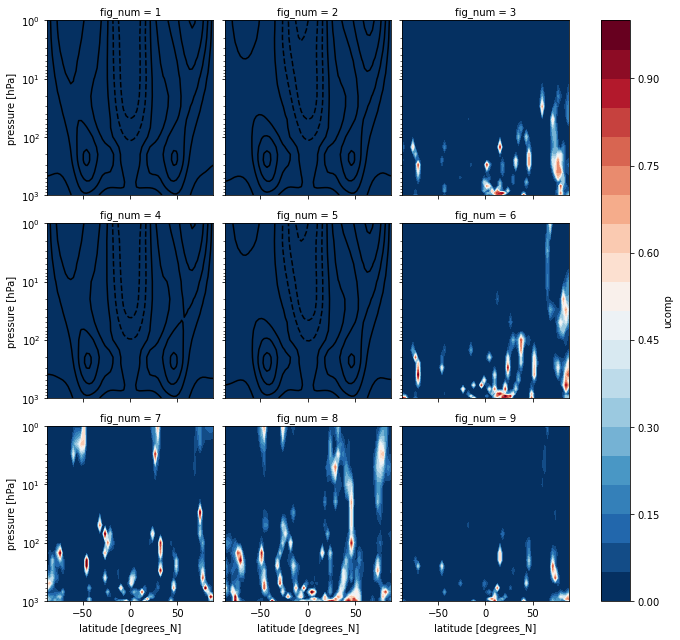

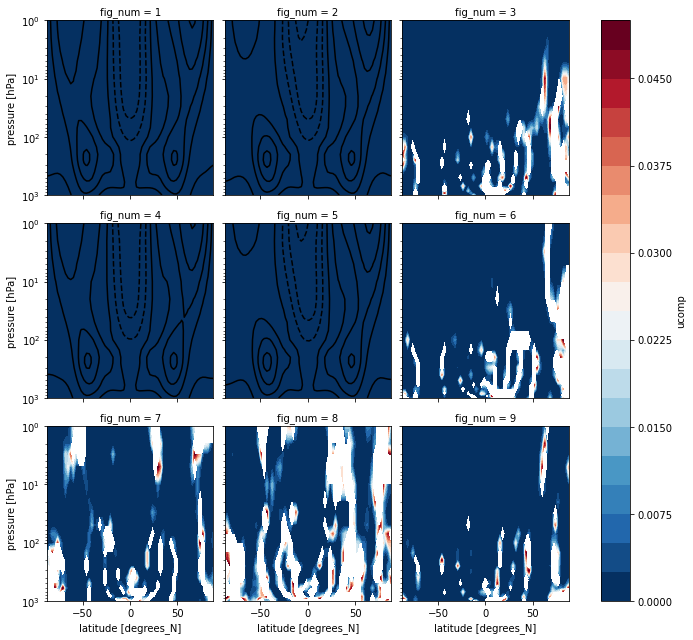

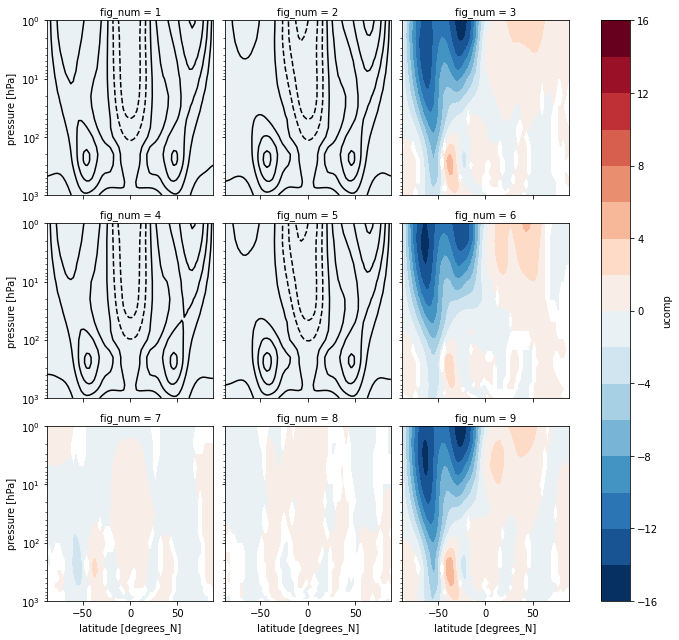

In [24]:
amp_list = ["0.2"]
#fig_diff_filtered  = stats_yay('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 100.0, 'lat', 'pfull')
####fig_diff_filtered.savefig("/home/561/gp8431/fig_diff_filtered_gh_02.png")
p_val, p_val_filt, fig_diff_filtered  = stats_yay('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 100.0, 'lat', 'pfull')
p_val.fig.savefig("/home/561/gp8431/p_val_gh_02.png")
p_val_filt.fig.savefig("/home/561/gp8431/p_val_filt_gh_02.png")
fig_diff_filtered.fig.savefig("/home/561/gp8431/fig_diff_filtered_gh_02.png")

In [ ]:
amp_list = ["0.2"]
p_val, p_val_filt, fig_diff_filtered  = stats_yay('gh', 'hght', amp_list, -90.0, 90.0, 0.0, 100.0, 'lon', 'lat')
####fig_diff_filtered.savefig("/home/561/gp8431/fig_diff_filtered_gh_02.png")
#p_val, p_val_filt, fig_diff_7_filtered  = stats_yay('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 100.0)
p_val.fig.savefig("/home/561/gp8431/p_val_gh_hght_02.png")
p_val_filt.fig.savefig("/home/561/gp8431/p_val_filt_gh_hght_02.png")
fig_diff_filtered.fig.savefig("/home/561/gp8431/fig_diff_filtered_gh_hght_02.png")

# FIGURE OUT NH NEG VALUES HERE FOR PRINTING, THEN WORK OUT PROJECTIONS!

In [ ]:
#     plt.rcParams["figure.figsize"] = [27,10]
#    # CHANGE NROWS AND NCOLS BASED ON SIZE OF AMP LIST
#    fig_proj, ax, trans = Projection(projection='EqualEarth', nrows=2, ncols=1, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
#    # REVIEW THIS BY PRINTING AX.FLATTEN
#    for a, b in enumerate(ax.flatten()):
#        #print(getattr(ma_list[a], var).squeeze())
#        # Change levels from 21 to 211 and remove vmin, vmax?
#        getattr(data_list_1[a], var).squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
#        b.set_title("Amp = " + amp_list[a])